In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../content/Video_Games_Sales_as_at_22_Dec_2016.csv.zip")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


Датафрейм на тему продаж компьютерных игр, имеет следующие колонки:
- `Name` - название игры;
- `Platform` - игровая платформа;
- `Year_of_Release` - год издание игры;
- `Genre` - игровой жанр;
- `Publisher` - издатель игры;
- `NA_Sales` - продажи игры в Северной Америке;
- `EU_Sales` - продажи игры в Европе;
- `JP_Sales` - продажи игры в Японии;
- `Other_Sales` - продажи игры в в других странах;
- `Global_Sales` - продажи игры в целом;
- `Critic_Score` - оценка игры критиками;
- `Critic_Count` - количество критиков, давших оценку;
- `User_Score` - оценка игры игроками;
- `User_Count` - количество игроков, давших оценку;
- `Developer` - разработчик игры;
- `Raiting` - возрастной рейтинг игры.

В качестве целевой переменной можно выбрать `Global_Sales` - продажи игры в целом.

Датафрейм содержит 16719 наблюдений и 16 признаков: 6 из них категориальные, 10 - вещественные. Большинство признаков имеют ненулевые (непропущенные) значения, больше всего пропусков в признаках `User_Score` и `User_Count`

## Анализ целевого признака

Распределение целевой переменной `Global_Sales`

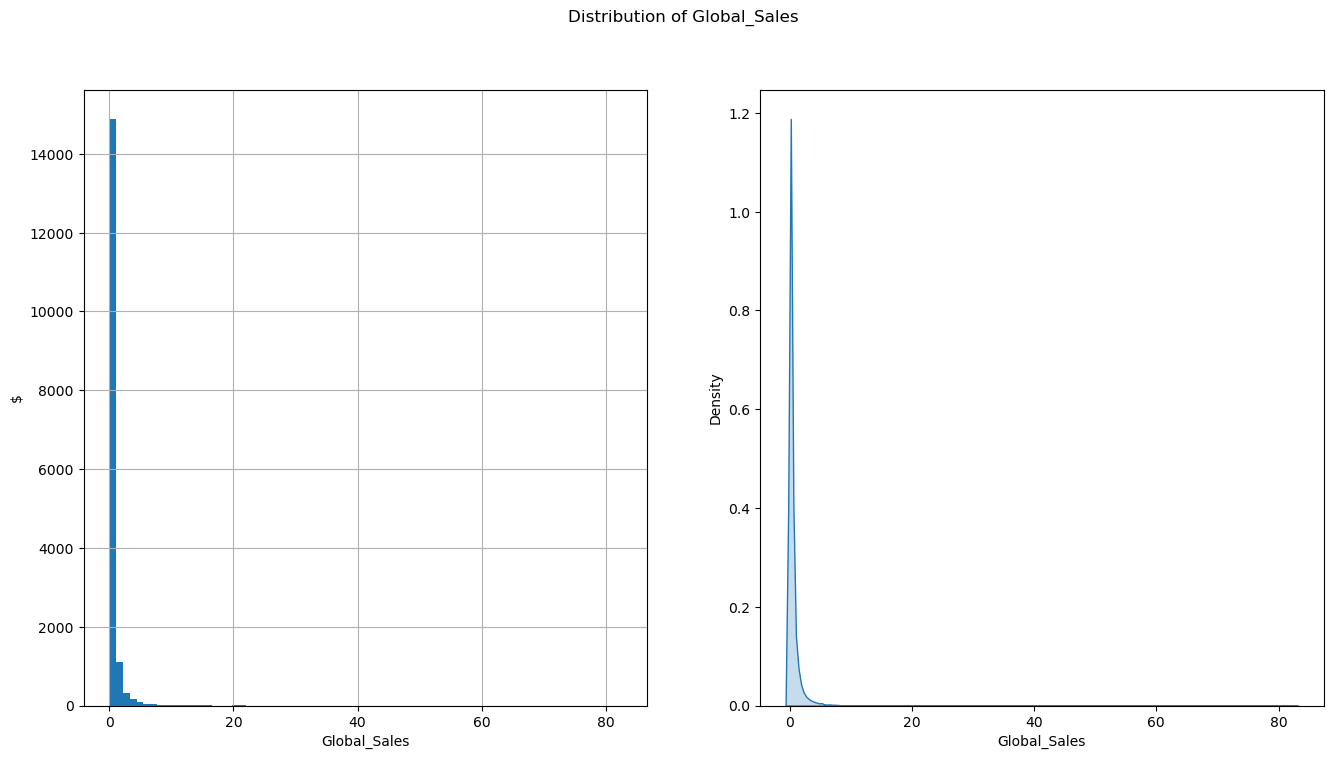

In [4]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
df['Global_Sales'].hist(density=False, bins=75)
plt.ylabel(r'$')
plt.xlabel('Global_Sales')

plt.subplot(122)
sns.kdeplot(df['Global_Sales'], legend=False, shade=True)
plt.xlabel('Global_Sales')

plt.suptitle('Distribution of Global_Sales');

Налицо распределение с длинным хвостом

In [5]:
df['Global_Sales'].value_counts()

0.02     1087
0.03      852
0.04      651
0.01      638
0.05      631
         ... 
5.14        1
5.15        1
5.16        1
5.20        1
82.53       1
Name: Global_Sales, Length: 629, dtype: int64

In [6]:
df["Global_Sales"].describe()

count    16719.000000
mean         0.533543
std          1.547935
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.530000
Name: Global_Sales, dtype: float64

Здесь очевидны выбросы справа (значение 82.530000) и слева (значения, близкие к 0).

Избавимся от них:

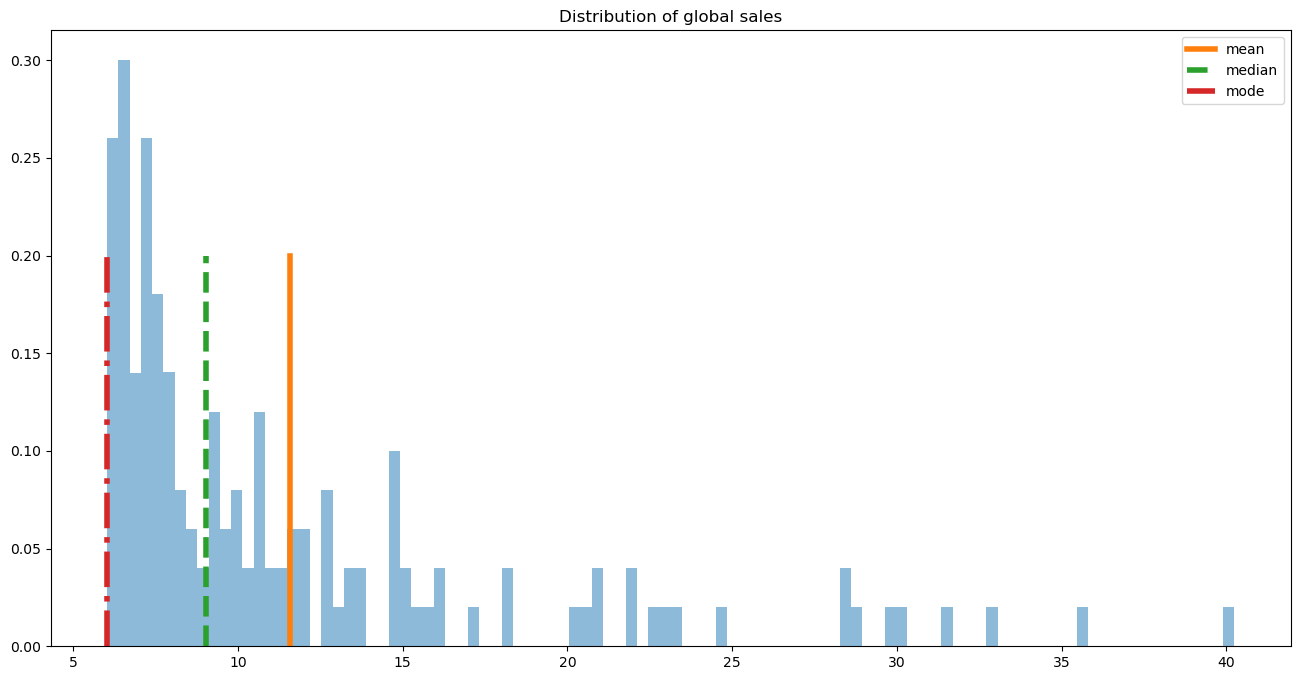

In [7]:
df_global_sales = df[(df["Global_Sales"] >= 6) & (df["Global_Sales"] <= 80)]

target_mean = round(df_global_sales['Global_Sales'].mean(), 2)
target_median = df_global_sales['Global_Sales'].median()
target_mode = df_global_sales['Global_Sales'].mode()[0]

plt.figure(figsize = (16, 8))
plt.hist(df_global_sales['Global_Sales'], density=True, alpha=0.5, bins=100)

y = np.linspace(0, 0.2, 2)
plt.plot([target_mean] * 2, y, label='mean',  linewidth=4)
plt.plot([target_median] * 2, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 2, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of global sales')
plt.legend()
plt.show()

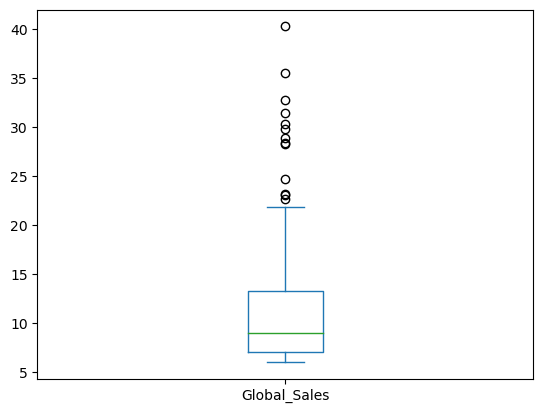

In [8]:
df_global_sales["Global_Sales"].plot(kind='box');

Теперь выбросов почти нет

## Анализ количественных признаков

In [9]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('Global_Sales', axis=1, inplace=True)

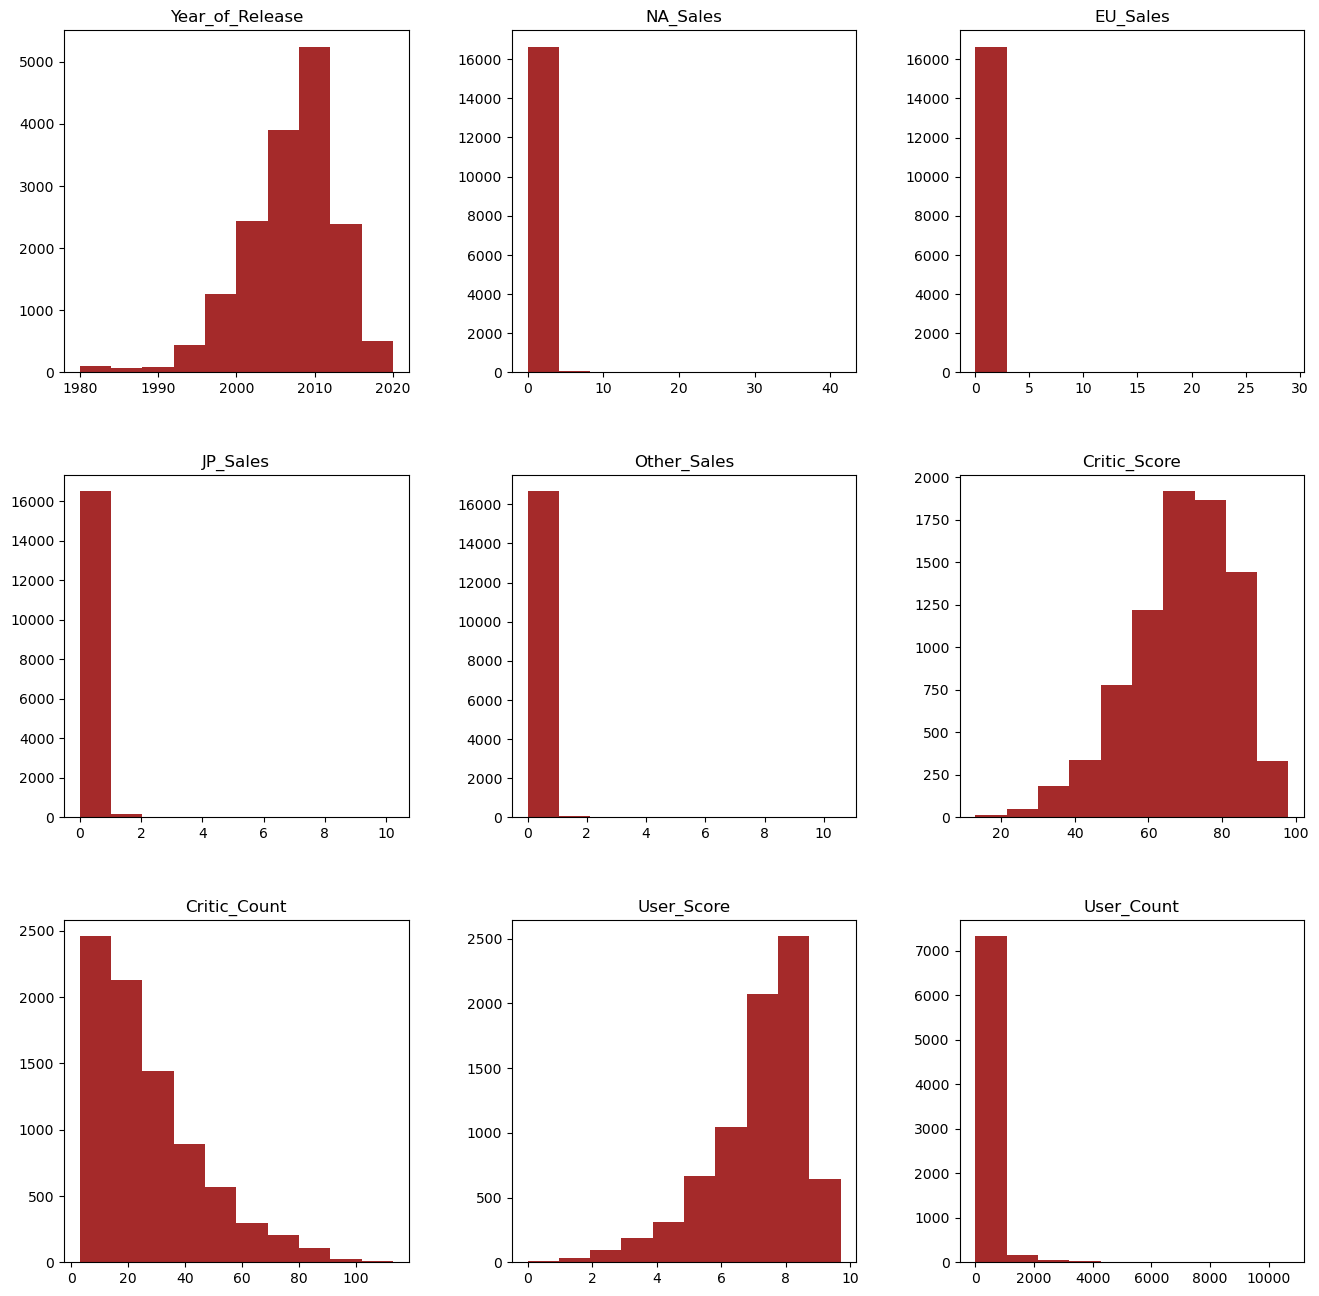

In [10]:
df_num_features.hist(figsize=(16, 16), grid=False, color='brown');

Распределения продаж (`NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`), а также `User_Count` имеют длинные хвосты.

Посмотрим на наличие линейных зависимостей глобальных продаж от остальных:

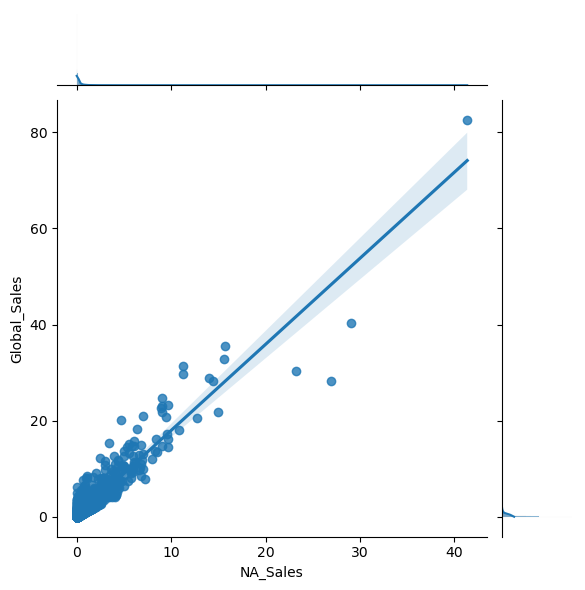

In [11]:
grid = sns.jointplot(data=df, x='NA_Sales', y='Global_Sales', kind='reg');

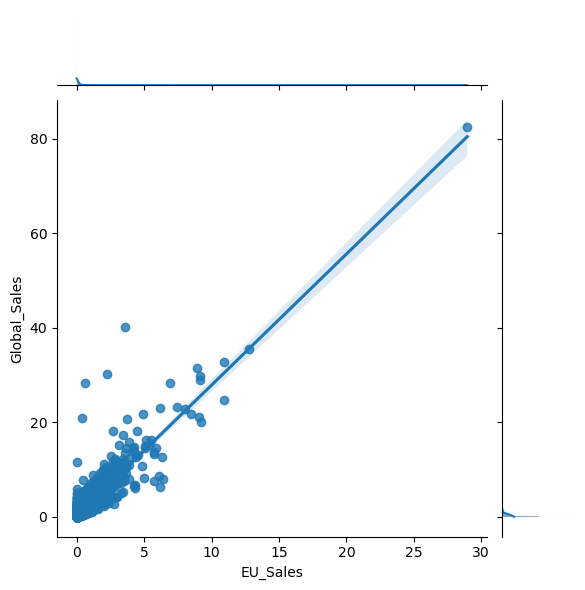

In [12]:
grid = sns.jointplot(data=df, x='EU_Sales', y='Global_Sales', kind='reg');

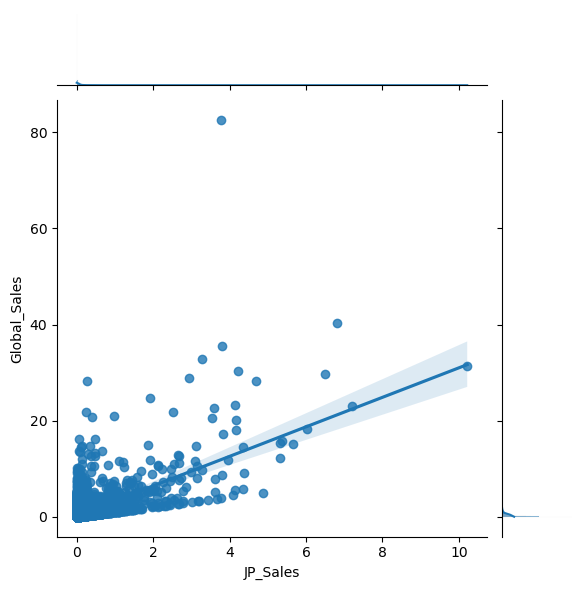

In [13]:
grid = sns.jointplot(data=df, x='JP_Sales', y='Global_Sales', kind='reg')

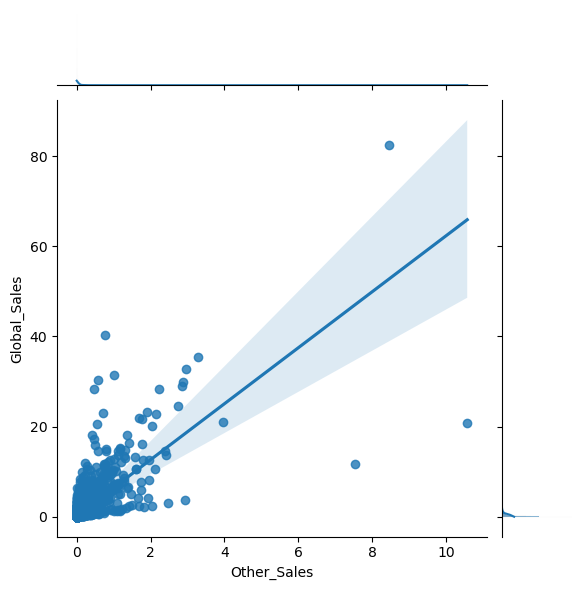

In [14]:
sns.jointplot(data=df, x='Other_Sales', y='Global_Sales', kind='reg');

Для распределений `NA_Sales` и `EU_Sales` прослеживается хорошо выраженная положительная линейная зависимость

## Анализ категориальных признаков

In [15]:
df_cat_features = df.select_dtypes(include='object')
df_cat_features.columns

Index(['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating'], dtype='object')

In [16]:
genre_counts_df = df_cat_features["Genre"].value_counts().reset_index()
genre_counts_df.columns = ["Genre", "counts"]

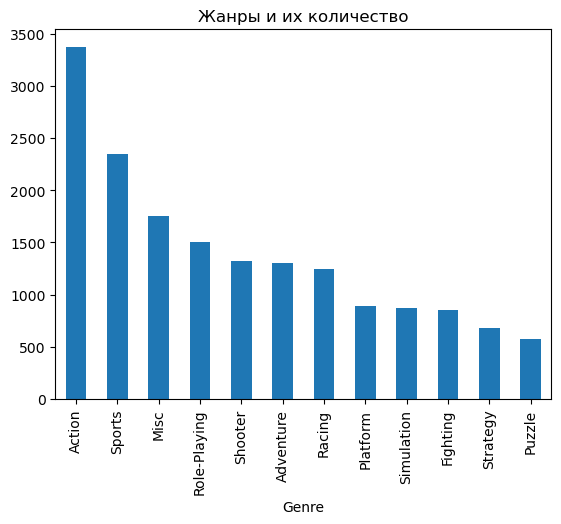

In [17]:
genre_counts_df.plot(x="Genre", title='Жанры и их количество', kind='bar', legend=False);

В датасете больше всего представлено игр в жанре `Action`

In [18]:
rating_counts_df = df_cat_features["Rating"].value_counts()

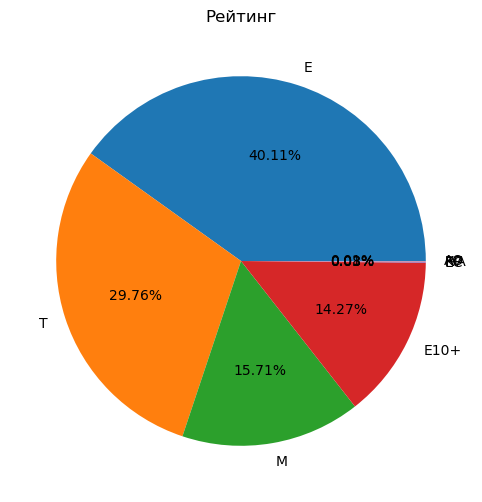

In [19]:
plt.figure(figsize=(10, 6))
plt.title('Рейтинг')
plt.pie(rating_counts_df.values
        , labels=rating_counts_df.index
        , autopct='%.2f%%'
        );

## Анализ матрицы корреляций

In [29]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0
corr_matrix

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,-0.27,0.00
NA_Sales,0.00,1.00,0.77,0.45,0.64,0.94,0.24,0.30,0.00,0.25
EU_Sales,0.00,0.77,1.00,0.44,0.72,0.90,0.22,0.28,0.00,0.28
JP_Sales,0.00,0.45,0.44,1.00,0.29,0.61,0.00,0.00,0.00,0.00
Other_Sales,0.00,0.64,0.72,0.29,1.00,0.75,0.20,0.25,0.00,0.24
Global_Sales,0.00,0.94,0.90,0.61,0.75,1.00,0.25,0.30,0.00,0.27
Critic_Score,0.00,0.24,0.22,0.00,0.20,0.25,1.00,0.43,0.58,0.26
Critic_Count,0.22,0.30,0.28,0.00,0.25,0.30,0.43,1.00,0.00,0.36
User_Score,-0.27,0.00,0.00,0.00,0.00,0.00,0.58,0.00,1.00,0.00
User_Count,0.00,0.25,0.28,0.00,0.24,0.27,0.26,0.36,0.00,1.00


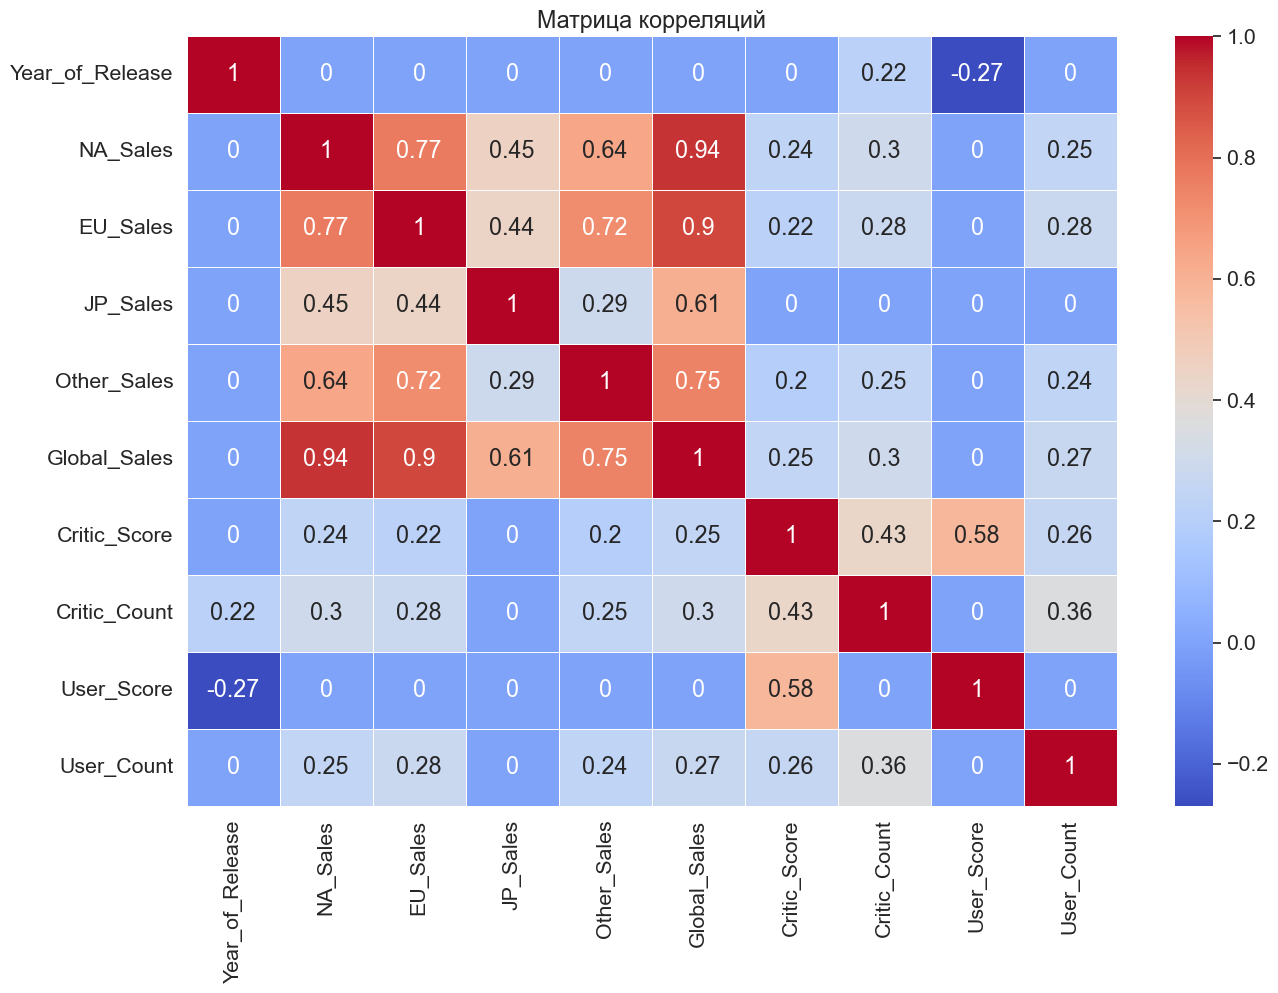

In [30]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Матрица корреляций')
plt.show()

Ожидаемо видим сильную линейную зависимость целевого признака глобальных продаж (`Global_Sales`) от продаж в Северной Америке (`NA_Sales`), чуть меньшую - от продаж в Европе (`EU_Sales`), ещё меньше - от продаж в других странах (`Other_Sales`), наименьшую из всех продаж - от продаж в Японии (`JP_Sales`). Имеется также слабая линейная зависимость целевого признака от количества голосовавших при оценке игры критиков (`Critic_Count`).

Наблюдается также отрицательная линейная зависиммость между годом выпуска игры (`Year_of_Release`) и пользовательским рейтингом (`User_Rating`), т. е. чем раньше была выпщуна игра, тем меньше её пользовательский рейтинг. И положительная линейная зависимость между рейтингом критиков (`Critic_Score`) и рейтингом пользователей (`User_Score`).

Как и в примере в вебинаре, в данных наблюдается сильно скоррелированный квадрат с признаками, отвечающими за продажи. Попробуем внести нелинейность в данные путем взвешенного суммирования признаков-продаж:

In [36]:
df['Weighted_Sales'] = .25*df["NA_Sales"] + .45*df["EU_Sales"] + .1*df["JP_Sales"] + .2*df["Other_Sales"]
df[['Weighted_Sales', 'Global_Sales']].corr()

,Weighted_Sales,Global_Sales
Weighted_Sales,1.000000,0.989591
Global_Sales,0.989591,1.000000


Получили один признак (`Weighted_Sales`), который сильно линейно коррелирует с целевым:

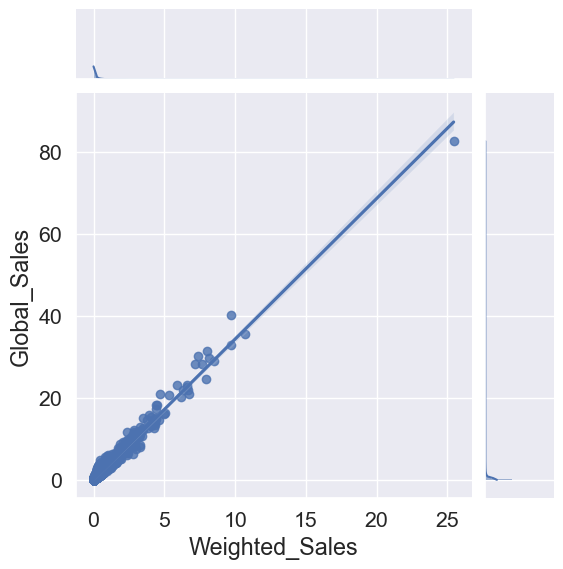

In [37]:
sns.jointplot(data=df, x='Weighted_Sales', y='Global_Sales', kind='reg');